## Lobes continuum plots


In [20]:
import os, sys, string, shutil
import numpy as np
from astropy.io import ascii, fits

import aplpy

from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm

import pyregion
from astropy import units as u   

FA_radeg = 50.673825
FA_decdeg = -37.208227
BeamRa = 50.693035
BeamDec = -37.253974

rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
#rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'


imDir = rootDir+'inIms/'

figDir = rootDir+'contFigs/'
get_ipython().magic(u'pylab inline')

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


Populating the interactive namespace from numpy and matplotlib
	+---------+
	 Inputs loaded
	+---------+


/home/maccagni/programs/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'rc', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [21]:
#-------------------------------------------------#
# SRT
#-------------------------------------------------#

srtdir = imDir
freqs = ['5700MHz',
         '5900MHz',
         '6100MHz',
         '6300MHz',
         '6500MHz',
         '6700MHz',
         '6874MHz',
         ]
filenames_srt = []
for i in xrange(0,len(freqs)):
    name_tmp = srtdir+'SRT_'+freqs[i]+'.fits'
    filenames_srt.append(name_tmp)      
    
print '''\\t+---------+\\n\\t SRT Names loaded\\n\\t+---------+'''

\t+---------+\n\t SRT Names loaded\n\t+---------+


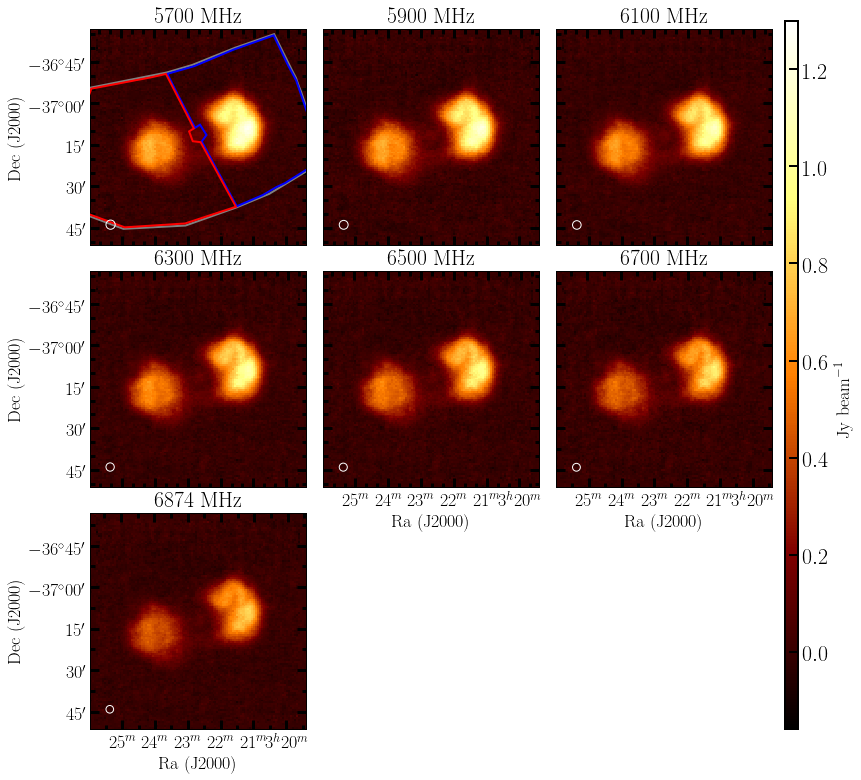

In [74]:


#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=filenames_srt[0]
b=filenames_srt[1]
c=filenames_srt[2]
d=filenames_srt[3]
e=filenames_srt[4]
f=filenames_srt[5]
g=filenames_srt[6]

fig = plt.figure(figsize=(12, 12))

f22 = fits.getdata(f, ext=0)
img = plt.imshow(f22, cmap="afmhot",vmin=-0.16,vmax=1.3)
plt.gca().set_visible(False)
cax = plt.axes([0.905, 0.1, 0.015, 0.82])
cbar = plt.colorbar(cax=cax)
ax = cbar.ax
ax.text(3.9,0.5,r'Jy beam$^{-1}$',rotation=90)

f1 = aplpy.FITSFigure(g, figure=fig, subplot=[0.1,0.1,0.25,0.25])
f1.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f1.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
#f1.show_contour(f,levels=[0.1], colors='white',lw=2)

f1.add_beam()
f1.beam.show()
f1.beam.set_corner('bottom left')
f1.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f1.set_title('6874 MHz')

#f1.show_colorbar()
#f1.colorbar.hide()

f1.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(2)

f1.axis_labels.set_xtext('Ra (J2000)')

f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')

#f1.ticks.set_xspacing(0.016666*2)
#f1.ticks.set_yspacing(0.333)

f1.ticks.show()


f2 = aplpy.FITSFigure(f, figure=fig, subplot=[0.64,0.38,0.25,0.25])
f2.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f2.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
#f2.show_contour(f,levels=[0.1], colors='white',lw=2)

f2.add_beam()
f2.beam.show()
f2.beam.set_corner('bottom left')
f2.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f2.set_title('6700 MHz')

#f2.show_colorbar()
#f2.colorbar.hide()


f2.tick_labels.set_yformat('dd:mm')

f2.tick_labels.set_xformat('hh:mm')
f2.axis_labels.set_xtext('Ra (J2000)')
f2.axis_labels.hide_y()
f2.tick_labels.hide_y()

f2.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f2.ticks.set_color('k')
f2.ticks.set_length(9)  # points
f2.ticks.set_linewidth(3)  # points
f2.ticks.set_minor_frequency(2)
f2.ticks.show()


f3 = aplpy.FITSFigure(e, figure=fig, subplot=[0.37,0.38,0.25,0.25])
f3.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f3.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
#f3.show_contour(e,levels=[0.1], colors='white',lw=2)

f3.set_title('6500 MHz')

#f3.show_colorbar()
#f3.colorbar.hide()

f3.add_beam()
f3.beam.show()
f3.beam.set_corner('bottom left')
f3.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f3.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f3.axis_labels.set_xtext('Ra (J2000)')
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.tick_labels.set_xformat('hh:mm')
f3.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f3.ticks.set_color('k')
f3.ticks.set_length(9)  # points
f3.ticks.set_linewidth(3)  # points
f3.ticks.set_minor_frequency(3)
f3.ticks.show()

f4 = aplpy.FITSFigure(d, figure=fig, subplot=[0.1,0.38,0.25,0.25])
f4.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f4.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
#f4.show_contour(d,levels=[0.1], colors='white',lw=2)

f4.set_title('6300 MHz')

#f4.show_colorbar()
#f4.colorbar.hide()

f4.add_beam()
f4.beam.show()
f4.beam.set_corner('bottom left')
f4.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f4.axis_labels.set_ytext('Dec (J2000)')
f4.axis_labels.hide_x()
f4.tick_labels.hide_x()
f4.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f4.tick_labels.set_yformat('dd:mm')
f4.ticks.set_color('k')
f4.ticks.set_length(9)  # points
f4.ticks.set_linewidth(3)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()

f5 = aplpy.FITSFigure(c, figure=fig, subplot=[0.64,0.66,0.25,0.25])
f5.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f5.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)

#f5.show_contour(c,levels=[0.1], colors='white',lw=2)

f5.set_title('6100 MHz')

f5.add_beam()
f5.beam.show()
f5.beam.set_corner('bottom left')
f5.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)


#f5.show_colorbar()
#f5.colorbar.hide()

f5.ticks.set_color('k')
f5.ticks.set_length(9)  # points
f5.ticks.set_linewidth(3)  # points
f5.ticks.set_minor_frequency(3)
f5.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f5.tick_labels.set_yformat('dd:mm')
f5.tick_labels.set_xformat('hh:mm')
f5.axis_labels.hide_y()
f5.tick_labels.hide_y()
f5.axis_labels.hide_x()
f5.tick_labels.hide_x()
f5.ticks.show()


f6 = aplpy.FITSFigure(b, figure=fig, subplot=[0.37,0.66,0.25,0.25])
f6.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.16,vmax=1.3)
f6.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
#f6.show_contour(b,levels=[0.1], colors='white',lw=2)

f6.set_title('5900 MHz')
f6.add_beam()
f6.beam.show()
f6.beam.set_corner('bottom left')
f6.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

#f6.show_colorbar()
#f6.colorbar.hide()

f6.axis_labels.hide_x()
f6.axis_labels.hide_y()
f6.tick_labels.hide_x()
f6.tick_labels.hide_y()

f6.tick_labels.set_font( weight='book',
                         stretch='normal', family='serif',
                         style='normal', variant='normal') 

f6.ticks.set_color('k')
f6.ticks.set_length(9)  # points
f6.ticks.set_linewidth(3)  # points
f6.ticks.set_minor_frequency(3)
f6.ticks.show()


f7 = aplpy.FITSFigure(a, figure=fig, subplot=[0.1,0.66,0.25,0.25])
f7.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                   exponent=1.,vmin=-0.16,vmax=1.3)
f7.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)

f7.add_beam()
f7.beam.show()
f7.beam.set_corner('bottom left')
f7.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)
f7.set_title('5700 MHz')#

#f7.show_colorbar()
#f7.colorbar.hide()

#f7.show_contour(a,levels=[0.1], colors='white',linewidth=2)

f7.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')

f7.axis_labels.set_ytext('Dec (J2000)')
f7.axis_labels.hide_x()
f7.tick_labels.hide_x()
f7.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f7.tick_labels.set_yformat('dd:mm')

f7.ticks.set_color('k')
f7.ticks.set_length(9)  # points
f7.ticks.set_linewidth(3)  # points
f7.ticks.set_minor_frequency(3)
f7.ticks.show()

f7.show_regions(rootDir+'inIms/regions/ToT.reg')
f7.show_regions(rootDir+'inIms/regions/WL.reg')
f7.show_regions(rootDir+'inIms/regions/EL.reg')




#fig.add_colorbar()
#fig.colorbar.set_box([0.905, 0.08, 0.015, 0.87], box_orientation='vertical')
#fig.colorbar.set_frame_linewidth(1)
#fig.colorbar.set_pad(0.2)
#fig.colorbar.set_font( weight='book', 
#                      stretch='normal', family='serif', 
#                      style='normal', variant='normal')
#f2.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')

fig.tight_layout()


fig.savefig(figDir+'Srt_continuum_images.png',format='png',overwrite=True)

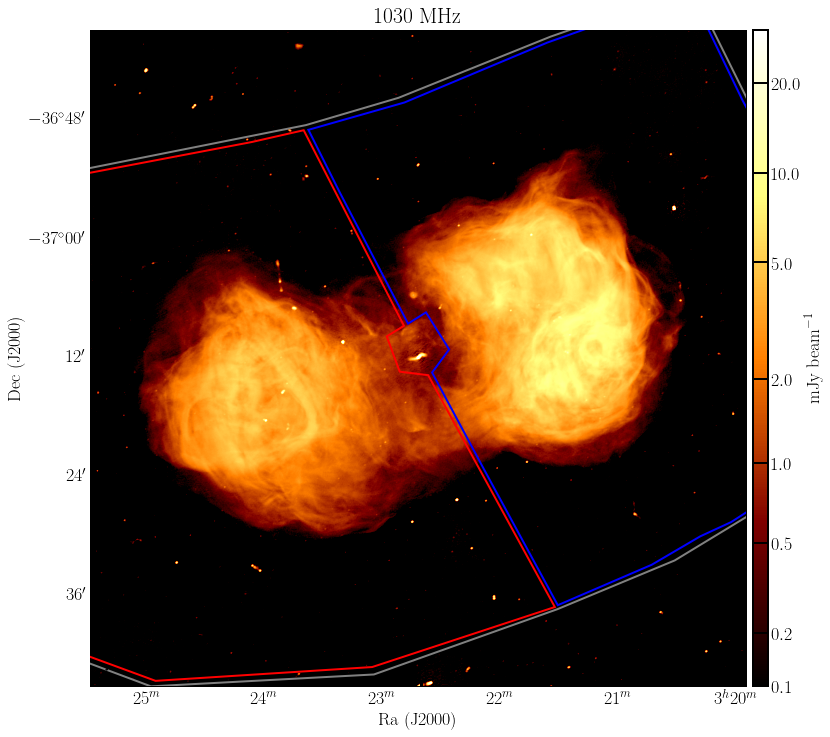

In [75]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#
import fluxInt
fint = fluxInt.flInt()
fint.rootdir = rootDir

a=imDir+'Meer_1030MHz_plot_mult.fits'
b=imDir+'Meer_1030MHz_plot_mult.fits'

#a=imDir+'meer_an.fits'
#b=imDir+'meer_an_plot.fits'

datas,heads = fint.openFile(a)
fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(12, 12))

#f22 = fits.getdata(b, ext=0)

#img = plt.imshow(f22, cmap="afmhot",norm=LogNorm(vmin=1e-1, vmax=3e1))
#,exponent=4,vmin=1e-1,vmid=-1.e-1,vmax=3e1)
#plt.gca().set_visible(False)
#cax = plt.axes([0.905, 0.08, 0.015, 0.775])
#cbar = plt.colorbar(cax=cax)
#ax = cbar.ax
#ax.text(3.9,0.5,r'mJy beam$^{-1}$',rotation=90)

f1 = aplpy.FITSFigure(b, figure=fig)
f1.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'log',exponent=4,vmin=1e-1,vmid=-1.e-1,vmax=3e1)

#f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg,width=1.1,height=1.1)

#f1.show_contour(b,levels=[0.1], colors='white',lw=2)
f1.add_beam()
f1.beam.show()
f1.beam.set_corner('bottom left')
f1.beam.set(edgecolor = 'black', facecolor = 'None', linewidth=1)

f1.set_title('1030 MHz')

f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.112, 0.015, 0.8], box_orientation='vertical')
f1.colorbar.set_frame_linewidth(1)
f1.colorbar.set_pad(0.1)
f1.colorbar.set_font( weight='book', 
                      stretch='normal', family='serif', 
                      style='normal', variant='normal')
f1.colorbar.set_axis_label_text(r'mJy beam$^{-1}$')
f1.colorbar.set_ticks([0.1,0.2,0.5,1,2,5,10,20])

#f1.show_colorbar()
#f1.colorbar.hide()

f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('Ra (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='medium', 
                         stretch='semi-expanded', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'mJy beam$^{-1}$')
f1.show_regions(rootDir+'inIms/regions/WL.reg')
f1.show_regions(rootDir+'inIms/regions/ToT.reg')
f1.show_regions(rootDir+'inIms/regions/EL.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean3.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean4.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean5.reg')
#f1.show_regions(rootDir+'inIms/regions/Ean6.reg')

#f1.show_regions(rootDir+'inIms/regions/Wan0.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan1.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan2.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan3.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan4.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan5.reg')
#f1.show_regions(rootDir+'inIms/regions/Wan6.reg')


fig.tight_layout()

fig.savefig(figDir+'Meer1030_continuum_imageRegLb1.png',format='png',overwrite=True)

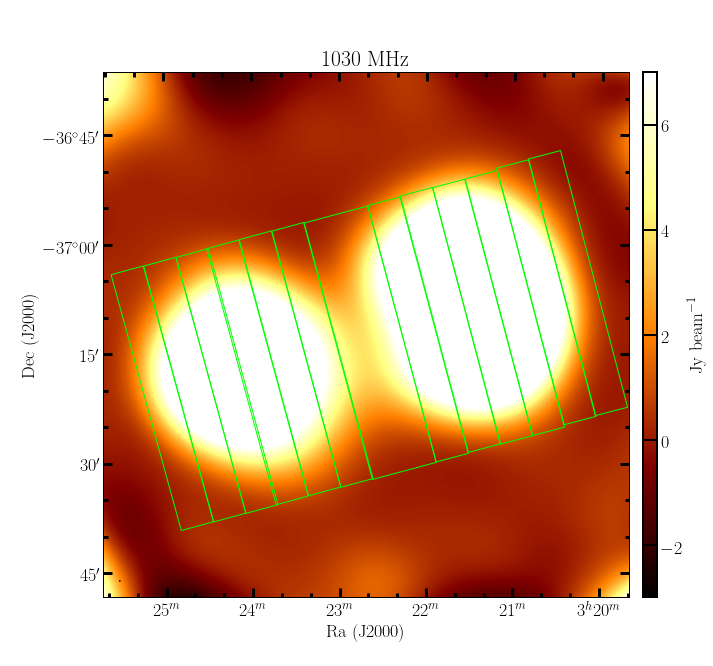

In [54]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#
import fluxInt
fint = fluxInt.flInt()
fint.rootdir = rootDir

a=imDir+'meer_an.fits'
b=imDir+'meer_an_plot.fits'

datas,heads = fint.openFile(a)
fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(12, 12))

f1 = aplpy.FITSFigure(b, figure=fig)
#f1.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'log',exponent=4,vmin=1e-5,vmid=-1.8e-3,vmax=1.8e-2)

f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg,width=1.2,height=1.2)

#f1.show_contour(b,levels=[0.1], colors='white',lw=2)
f1.add_beam()
f1.beam.show()
f1.beam.set_corner('bottom left')
f1.beam.set(edgecolor = 'black', facecolor = 'None', linewidth=1)

f1.set_title('1030 MHz')

f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.08, 0.015, 0.87], box_orientation='vertical')
f1.colorbar.set_frame_linewidth(1)
f1.colorbar.set_pad(0.2)
f1.colorbar.set_font( weight='book', 
                      stretch='normal', family='serif', 
                      style='normal', variant='normal')
f1.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')
#f1.show_colorbar()
#f1.colorbar.hide()
f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('Ra (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='medium', 
                         stretch='semi-expanded', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee0.reg')

f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee1.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee2.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee3.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee4.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee5.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee6.reg')

f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww1.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww2.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww3.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww4.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww5.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww6.reg')


fig.tight_layout()

fig.savefig(figDir+'Meer1030_continuum_imageSl.png',format='png',overwrite=True)

In [ ]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#
import fluxInt
fint = fluxInt.flInt()
fint.rootdir = rootDir

a=imDir+'Meer_1030MHz_plot.fits'
b=imDir+'Meer_1030MHz_plot.fits'

datas,heads = fint.openFile(a)
fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(12, 12))

f1 = aplpy.FITSFigure(b, figure=fig)
f1.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'log',exponent=4,vmin=1e-8,vmid=-5e-5,vmax=1.8e-2)

#f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg,width=1.2,height=1.2)

#f1.show_contour(b,levels=[0.1], colors='white',lw=2)
f1.add_beam()
f1.beam.show()
f1.beam.set_corner('bottom left')
f1.beam.set(edgecolor = 'black', facecolor = 'None', linewidth=1)

f1.set_title('1030 MHz')

f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.08, 0.015, 0.87], box_orientation='vertical')
f1.colorbar.set_frame_linewidth(1)
f1.colorbar.set_pad(0.2)
f1.colorbar.set_font( weight='book', 
                      stretch='normal', family='serif', 
                      style='normal', variant='normal')
f1.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')
#f1.show_colorbar()
#f1.colorbar.hide()
f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('Ra (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='medium', 
                         stretch='semi-expanded', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee0.reg')

f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee1.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee2.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee3.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee4.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee5.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee6.reg')

f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww1.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww2.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww3.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww4.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww5.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww6.reg')


fig.tight_layout()

fig.savefig(figDir+'Meer1030_continuum_imageSlRe.png',format='png',overwrite=True)

In [ ]:
#-------------------------------#
# MeerKAT                       #
#-------------------------------#
import fluxInt
fint = fluxInt.flInt()
fint.rootdir = rootDir

a=imDir+'CONVL/MASK.FITS'
b=imDir+'CONVL/MASK_plot.FITS'

datas,heads = fint.openFile(a)
fits.writeto(b,datas,heads,overwrite=True)
# initialize plotting parameters

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
#a=imDir+'Meer_1030MHz.fits'


fig = plt.figure(figsize=(12, 12))

f1 = aplpy.FITSFigure(b, figure=fig)
#f1.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'log',exponent=4,vmin=1e-5,vmid=-1.8e-3,vmax=1.8e-2)

f1.show_colorscale(aspect='equal', cmap='afmhot',vmin=-3,vmax=7)

#f1.recenter(FA_radeg,FA_decdeg,width=0.98,height=0.98)
f1.recenter(FA_radeg,FA_decdeg,width=1.2,height=1.2)

#f1.show_contour(b,levels=[0.1], colors='white',lw=2)
#f1.add_beam()
#f1.beam.show()
#f1.beam.set_corner('bottom left')
#f1.beam.set(edgecolor = 'black', facecolor = 'None', linewidth=1)

f1.set_title('1030 MHz')

f1.show_colorbar()
#f1.colorbar.set_box([0.905, 0.08, 0.015, 0.87], box_orientation='vertical')
f1.colorbar.set_frame_linewidth(1)
f1.colorbar.set_pad(0.2)
f1.colorbar.set_font( weight='book', 
                      stretch='normal', family='serif', 
                      style='normal', variant='normal')
f1.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')
#f1.show_colorbar()
#f1.colorbar.hide()
f1.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('Ra (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='medium', 
                         stretch='semi-expanded', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee0.reg')

f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee1.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee2.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee3.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee4.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee5.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ee6.reg')

f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww1.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww2.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww3.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww4.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww5.reg')
f1.show_regions(rootDir+'inIms/regions/slice_regions/Fa_slices_ww6.reg')


fig.tight_layout()

fig.savefig(figDir+'Mask_continuum_imageSl.png',format='png',overwrite=True)

\t+---------+\n\t PLanck Names loaded\n\t+---------+
INFO: Auto-setting vmin to -8.065e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.739e-02 [aplpy.core]
INFO: Auto-setting vmin to -9.194e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.488e-01 [aplpy.core]
INFO: Auto-setting vmin to -2.399e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.619e-01 [aplpy.core]
INFO: Auto-setting vmin to -3.043e-01 [aplpy.core]
INFO: Auto-setting vmax to  7.745e-01 [aplpy.core]
INFO: Auto-setting vmin to -7.369e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.504e+00 [aplpy.core]
INFO: Auto-setting vmin to -8.913e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.633e+00 [aplpy.core]


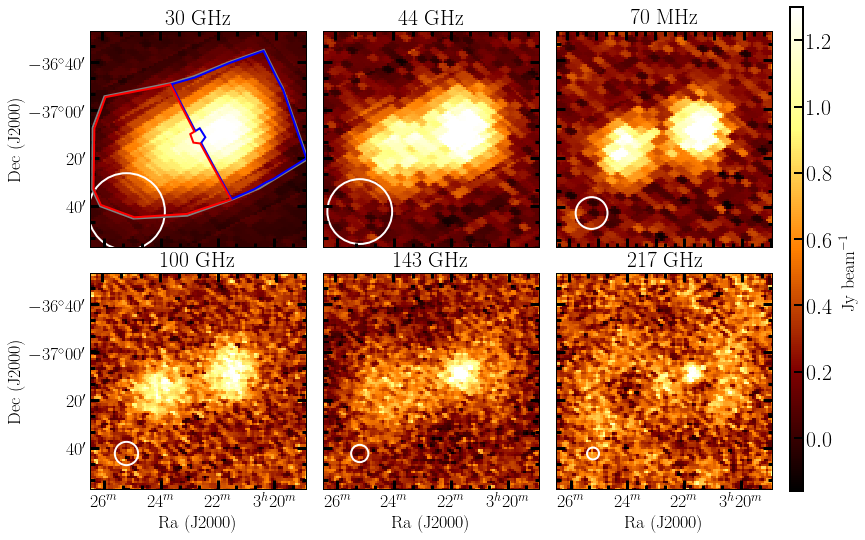

In [76]:
#-------------------------------------------------#
# Planck
#-------------------------------------------------#

BeamRa = 51.299614
BeamDec = -37.707858

planckDir = imDir
freqs = ['30',
         '44',
         '70',
         '100',
         '143',
         '217',
         ]
filenames_planck = []
for i in xrange(0,3):
    name_tmp = planckDir+'LFI_'+freqs[i]+'_Fg_bt32.fits'
    filenames_planck.append(name_tmp)      


for i in xrange(0,3):
    name_tmp = planckDir+'HFI_'+freqs[i+3]+'_Fg_bt32.fits'
    filenames_planck.append(name_tmp)      
    
print '''\\t+---------+\\n\\t PLanck Names loaded\\n\\t+---------+'''


#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=filenames_planck[0]
b=filenames_planck[1]
c=filenames_planck[2]
d=filenames_planck[3]
e=filenames_planck[4]
f=filenames_planck[5]

fig = plt.figure(figsize=(12, 12))


f22 = fits.getdata(d, ext=0)
img = plt.imshow(f22, cmap="afmhot",vmin=-0.16,vmax=1.3)
plt.gca().set_visible(False)
cax = plt.axes([0.91, 0.378, 0.015, 0.56])
cbar = plt.colorbar(cax=cax)
ax = cbar.ax
ax.text(3.9,0.5,r'Jy beam$^{-1}$',rotation=90)


f2 = aplpy.FITSFigure(f, figure=fig, subplot=[0.64,0.38,0.25,0.25])
f2.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.)
f2.recenter(FA_radeg,FA_decdeg,width=1.5,height=1.5)
#f2.show_contour(f,levels=[0.1], colors='white',lw=2)

#f2.add_beam()
#f2.beam.show()
#f2.beam.set_corner('bottom left')
#f2.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)


#f2.show_colorbar()
#f2.colorbar.hide()
#f2.colorbar.set_box([0.905, 0.08, 0.015, 0.87], box_orientation='vertical')
#f2.colorbar.set_frame_linewidth(1)
#f2.colorbar.set_pad(0.2)
#f2.colorbar.set_font( weight='book', 
#                      stretch='normal', family='serif', 
#                      style='normal', variant='normal')
#f2.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')


f2.set_title('217 GHz')
f2.show_ellipses(BeamRa, BeamDec, 5.0/60., 5.0/60., angle=0, edgecolor='white',linewidth=2)

f2.tick_labels.set_xformat('hh:mm')
f2.axis_labels.set_xtext('Ra (J2000)')
f2.axis_labels.hide_y()
f2.tick_labels.hide_y()

f2.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f2.ticks.set_color('k')
f2.ticks.set_length(9)  # points
f2.ticks.set_linewidth(3)  # points
f2.ticks.set_minor_frequency(3)
f2.ticks.show()


f3 = aplpy.FITSFigure(e, figure=fig, subplot=[0.37,0.38,0.25,0.25])
f3.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.)
f3.recenter(FA_radeg,FA_decdeg,width=1.5,height=1.5)
#f3.show_contour(e,levels=[0.1], colors='white',lw=2)

f3.set_title('143 GHz')
f3.show_ellipses(BeamRa, BeamDec, 7.2/60., 7.2/60., angle=0, edgecolor='white',linewidth=2)

#f3.show_colorbar()
#f3.colorbar.hide()

#f3.add_beam()
#f3.beam.show()
#f3.beam.set_corner('bottom left')
#f3.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f3.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f3.axis_labels.set_xtext('Ra (J2000)')
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.tick_labels.set_xformat('hh:mm')
f3.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f3.ticks.set_color('k')
f3.ticks.set_length(9)  # points
f3.ticks.set_linewidth(3)  # points
f3.ticks.set_minor_frequency(3)
f3.ticks.show()

f4 = aplpy.FITSFigure(d, figure=fig, subplot=[0.1,0.38,0.25,0.25])
f4.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.)
f4.recenter(FA_radeg,FA_decdeg,width=1.5,height=1.5)
#f4.show_contour(d,levels=[0.1], colors='white',lw=2)#

f4.set_title('100 GHz')
f4.show_ellipses(BeamRa, BeamDec, 9.7/60., 9.7/60., angle=0, edgecolor='white',linewidth=2)

#f4.show_colorbar()
#f4.colorbar.hide()

#f4.add_beam()
#f4.beam.show()
#f4.beam.set_corner('bottom left')
#f4.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f4.axis_labels.set_ytext('Dec (J2000)')
f4.tick_labels.set_yformat('dd:mm')

f4.tick_labels.set_xformat('hh:mm')
f4.axis_labels.set_xtext('Ra (J2000)')

f4.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f4.ticks.set_color('k')
f4.ticks.set_length(9)  # points
f4.ticks.set_linewidth(3)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()

f5 = aplpy.FITSFigure(c, figure=fig, subplot=[0.64,0.66,0.25,0.25])
f5.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.)
f5.recenter(FA_radeg,FA_decdeg,width=1.47,height=1.47)

#f5.show_contour(c,levels=[0.1], colors='white',lw=2)

f5.set_title('70 MHz')

#f5.add_beam()
#f5.beam.show()
#f5.beam.set_corner('bottom left')
#f5.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f5.show_ellipses(BeamRa, BeamDec, 13./60., 13./60., angle=0, edgecolor='white',linewidth=2)

#f5.show_colorbar()
#f5.colorbar.hide()

f5.ticks.set_color('k')
f5.ticks.set_length(9)  # points
f5.ticks.set_linewidth(3)  # points
f5.ticks.set_minor_frequency(3)
f5.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f5.tick_labels.set_yformat('dd:mm')
f5.tick_labels.set_xformat('hh:mm')
f5.axis_labels.hide_y()
f5.tick_labels.hide_y()
f5.axis_labels.hide_x()
f5.tick_labels.hide_x()
f5.ticks.show()


f6 = aplpy.FITSFigure(b, figure=fig, subplot=[0.37,0.66,0.25,0.25])
f6.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.)
f6.recenter(FA_radeg,FA_decdeg,width=1.5,height=1.5)
#f6.show_contour(b,levels=[0.1], colors='white',lw=2)

f6.set_title('44 GHz')
#f6.add_beam()
#f6.beam.show()
#f6.beam.set_corner('bottom left')
#f6.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)
f6.show_ellipses(BeamRa, BeamDec, 27./60., 27./60., angle=0, edgecolor='white',linewidth=2)

#f6.show_colorbar()
#f6.colorbar.hide()

f6.axis_labels.hide_x()
f6.axis_labels.hide_y()
f6.tick_labels.hide_x()
f6.tick_labels.hide_y()

f6.tick_labels.set_font( weight='book',
                         stretch='normal', family='serif',
                         style='normal', variant='normal') 

f6.ticks.set_color('k')
f6.ticks.set_length(9)  # points
f6.ticks.set_linewidth(3)  # points
f6.ticks.set_minor_frequency(3)
f6.ticks.show()


f7 = aplpy.FITSFigure(a, figure=fig, subplot=[0.1,0.66,0.25,0.25])
f7.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                   exponent=1.)
f7.recenter(FA_radeg,FA_decdeg,width=1.5,height=1.5)
#f7.show_colorbar()
#f7.colorbar.hide()

#f7.add_beam()
#f7.beam.show()
#f7.beam.set_corner('bottom left')
#f7.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)
f7.set_title('30 GHz')#
f7.show_ellipses(BeamRa, BeamDec, 32./60., 32./60., angle=0, edgecolor='white',linewidth=2)

#f7.show_contour(a,levels=[0.1], colors='white',linewidth=2)

f7.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')

f7.axis_labels.set_ytext('Dec (J2000)')
f7.axis_labels.hide_x()
f7.tick_labels.hide_x()
f7.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f7.tick_labels.set_yformat('dd:mm')

f7.ticks.set_color('k')
f7.ticks.set_length(9)  # points
f7.ticks.set_linewidth(3)  # points
f7.ticks.set_minor_frequency(3)
f7.ticks.show()

f7.show_regions(rootDir+'inIms/regions/ToT.reg')
f7.show_regions(rootDir+'inIms/regions/WL.reg')
f7.show_regions(rootDir+'inIms/regions/EL.reg')


fig.tight_layout()

fig.savefig(figDir+'Planck_continuum_images.png',format='png',overwrite=True)

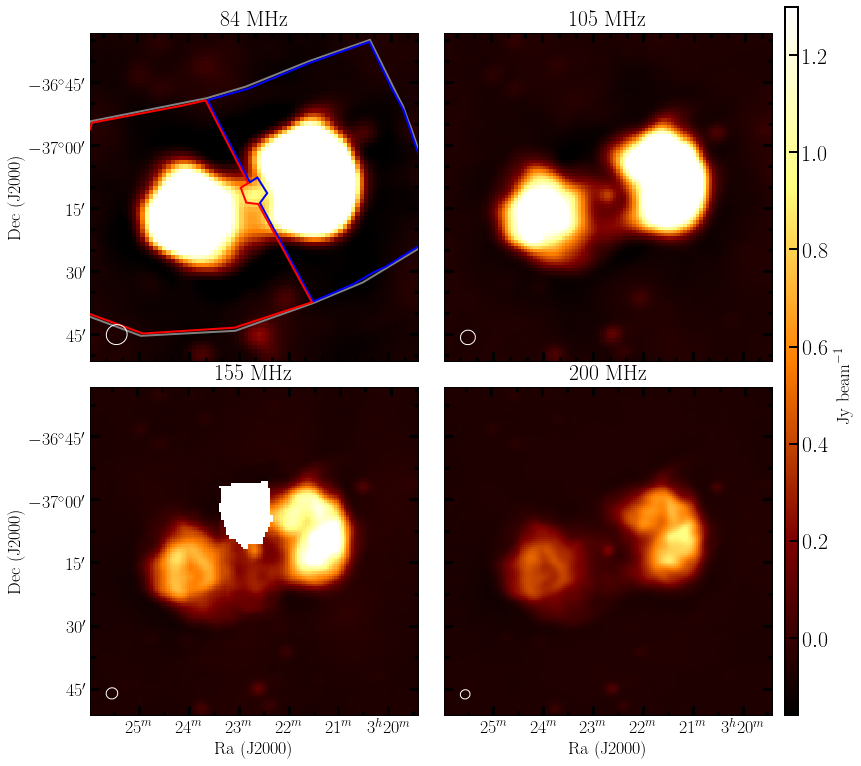

In [77]:
filenames_mwa=[imDir+'MWA_84MHz_bt32.fits',
               imDir+'MWA_105MHz_bt32.fits',
               imDir+'MWA_155MHz_bt32.fits',
               imDir+'MWA_200MHz_bt32.fits']

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=filenames_mwa[0]
b=filenames_mwa[1]
c=filenames_mwa[2]
d=filenames_mwa[3]

fig = plt.figure(figsize=(12, 12))

f22 = fits.getdata(f, ext=0)
img = plt.imshow(f22, cmap="afmhot",vmin=-0.16,vmax=1.3)
plt.gca().set_visible(False)
cax = plt.axes([0.905, 0.1, 0.015, 0.82])
cbar = plt.colorbar(cax=cax)
ax = cbar.ax
ax.text(3.9,0.5,r'Jy beam$^{-1}$',rotation=90)

f1 = aplpy.FITSFigure(d, figure=fig, subplot=[0.51,0.1,0.38,0.38])
f1.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5,vmax=8.)
f1.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
#f1.show_contour(d,levels=[0.4], colors='white',lw=2)

f1.add_beam()
f1.beam.show()
f1.beam.set_corner('bottom left')
f1.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f1.set_title('200 MHz')

#f1.show_colorbar()
#f1.colorbar.hide()

f1.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(2)

f1.axis_labels.set_xtext('Ra (J2000)')

f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')

f1.axis_labels.hide_y()
f1.tick_labels.hide_y()

#f1.ticks.set_xspacing(0.016666*2)
#f1.ticks.set_yspacing(0.333)

f1.ticks.show()


f2 = aplpy.FITSFigure(c, figure=fig, subplot=[0.1,0.1,0.38,0.38])
f2.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5,vmax=8.)
f2.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
#f2.show_contour(c,levels=[0.5], colors='white',lw=2)

f2.add_beam()
f2.beam.show()
f2.beam.set_corner('bottom left')
f2.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f2.set_title('155 MHz')

#f2.show_colorbar()
#f2.colorbar.hide()


f2.tick_labels.set_yformat('dd:mm')

f2.tick_labels.set_xformat('hh:mm')
f2.axis_labels.set_xtext('Ra (J2000)')
#f2.axis_labels.hide_y()
#f2.tick_labels.hide_y()

f2.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f2.ticks.set_color('k')
f2.ticks.set_length(9)  # points
f2.ticks.set_linewidth(3)  # points
f2.ticks.set_minor_frequency(2)
f2.ticks.show()


f3 = aplpy.FITSFigure(b, figure=fig, subplot=[0.51,0.51,0.38,0.38])
f3.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5,vmax=8.)
f3.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
#f3.show_contour(b,levels=[0.3], colors='white',lw=2)

f3.set_title('105 MHz')

#f3.show_colorbar()
#f3.colorbar.hide()

f3.add_beam()
f3.beam.show()
f3.beam.set_corner('bottom left')
f3.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f3.axis_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f3.axis_labels.set_xtext('Ra (J2000)')
f3.axis_labels.hide_y()
f3.tick_labels.hide_y()
f3.axis_labels.hide_x()
f3.tick_labels.hide_x()
f3.tick_labels.set_xformat('hh:mm')
f3.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f3.ticks.set_color('k')
f3.ticks.set_length(9)  # points
f3.ticks.set_linewidth(3)  # points
f3.ticks.set_minor_frequency(3)
f3.ticks.show()

f4 = aplpy.FITSFigure(a, figure=fig, subplot=[0.1,0.51,0.38,0.38])
f4.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5,vmax=8.)
f4.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
#f4.show_contour(d,levels=[0.25], colors='white',lw=2)

f4.set_title('84 MHz')

#f4.show_colorbar()
#f4.colorbar.hide()

f4.add_beam()
f4.beam.show()
f4.beam.set_corner('bottom left')
f4.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f4.axis_labels.set_ytext('Dec (J2000)')
f4.axis_labels.hide_x()
f4.tick_labels.hide_x()
f4.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f4.tick_labels.set_yformat('dd:mm')
f4.ticks.set_color('k')
f4.ticks.set_length(9)  # points
f4.ticks.set_linewidth(3)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()


f4.show_regions(rootDir+'inIms/regions/ToT.reg')
f4.show_regions(rootDir+'inIms/regions/WL.reg')
f4.show_regions(rootDir+'inIms/regions/EL.reg')


fig.tight_layout()


fig.savefig(figDir+'MWA_continuum_images.png',format='png',overwrite=True)

INFO: Auto-setting vmin to -2.973e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.310e-02 [aplpy.core]
INFO: Auto-setting vmin to -4.580e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.627e-01 [aplpy.core]


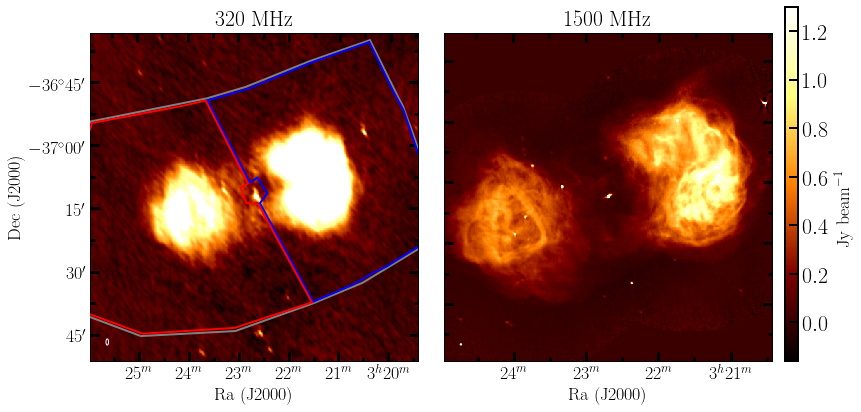

In [78]:
filenames_vla=[imDir+'VLA_320MHz_bt32.fits',
               imDir+'VLA_1500MHz_bt32.fits']

#vladir = rootDir+'/VLA/'
#filename_vla = vladir+'FornaxA_307-333MHz.fits'

params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=filenames_vla[0]
b=filenames_vla[1]

fig = plt.figure(figsize=(12, 12))

f22 = fits.getdata(f, ext=0)
img = plt.imshow(f22, cmap="afmhot",vmin=-0.16,vmax=1.3)
plt.gca().set_visible(False)
cax = plt.axes([0.905, 0.51, 0.015, 0.41])
cbar = plt.colorbar(cax=cax)
ax = cbar.ax
ax.text(3.9,0.5,r'Jy beam$^{-1}$',rotation=90)

f1 = aplpy.FITSFigure(b, figure=fig, subplot=[0.51,0.51,0.38,0.38])
f1.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.)
f1.recenter(FA_radeg,FA_decdeg,width=0.9,height=0.9)
f1.show_contour(b,levels=[0.4], colors='white',lw=2)

f1.add_beam()
f1.beam.show()
f1.beam.set_corner('bottom left')
f1.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f1.set_title('1500 MHz')

#f1.show_colorbar()
#f1.colorbar.hide()

f1.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(9)  # points
f1.ticks.set_linewidth(3)  # points
f1.ticks.set_minor_frequency(2)

f1.axis_labels.set_xtext('Ra (J2000)')

f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')

f1.axis_labels.hide_y()
f1.tick_labels.hide_y()

#f1.ticks.set_xspacing(0.016666*2)
#f1.ticks.set_yspacing(0.333)

f1.ticks.show()


f2 = aplpy.FITSFigure(a, figure=fig, subplot=[0.1,0.51,0.38,0.38])
f2.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.)
f2.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)
f2.show_contour(a,levels=[0.5], colors='white',lw=2)

f2.add_beam()
f2.beam.show()
f2.beam.set_corner('bottom left')
f2.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f2.set_title('320 MHz')

#f2.show_colorbar()
#f2.colorbar.hide()


f2.tick_labels.set_yformat('dd:mm')

f2.tick_labels.set_xformat('hh:mm')
f2.axis_labels.set_xtext('Ra (J2000)')
#f2.axis_labels.hide_y()
#f2.tick_labels.hide_y()

f2.tick_labels.set_font( weight='book', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f2.ticks.set_color('k')
f2.ticks.set_length(9)  # points
f2.ticks.set_linewidth(3)  # points
f2.ticks.set_minor_frequency(2)
f2.ticks.show()


f2.show_regions(rootDir+'inIms/regions/ToT.reg')
f2.show_regions(rootDir+'inIms/regions/WL.reg')
f2.show_regions(rootDir+'inIms/regions/EL.reg')


fig.tight_layout()


fig.savefig(figDir+'VLA_continuum_images.png',format='png',overwrite=True)